In [19]:
import pandas as pd
import csv, sys
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from datetime import datetime, timezone

csv.field_size_limit(sys.maxsize)

df = pd.read_csv('../emotions.csv')
df.head(10)

,Unnamed: 0,file,message,subject,text,date,from,to,emotion_scores
0,0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...,NaN,Here is our forecast\n\n,2001-05-14 23:39:00+00:00,phillip.allen@enron.com,tim.belden@enron.com,[0. 1. 0. 0. 0. 0. 0. 0. 0. 1.]
1,1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...,NaN,Traveling to have a business meeting takes the...,2001-05-04 20:51:00+00:00,phillip.allen@enron.com,john.lavorato@enron.com,[0.03571429 0.14285714 0.03571429 0.07142857 0...
2,2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...,test,test successful. way to go!!!,2000-10-18 10:00:00+00:00,phillip.allen@enron.com,leah.arsdall@enron.com,[0. 0.5 0. 0. 0.5 0. 0.5 0. 0. 0.5]
3,3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...,NaN,"Randy,\n\n Can you send me a schedule of the s...",2000-10-23 13:13:00+00:00,phillip.allen@enron.com,randall.gay@enron.com,[0. 0.16666667 0. 0. 0...
4,4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...,Hello,Let's shoot for Tuesday at 11:45.,2000-08-31 12:07:00+00:00,phillip.allen@enron.com,greg.piper@enron.com,[1. 0. 0. 1. 0. 1. 0. 0. 0. 0.]
5,5,allen-p/_sent_mail/1002.,Message-ID: <30965995.1075863688265.JavaMail.e...,Hello,"Greg,\n\n How about either next Tuesday or Thu...",2000-08-31 11:17:00+00:00,phillip.allen@enron.com,greg.piper@enron.com,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
6,6,allen-p/_sent_mail/1003.,Message-ID: <16254169.1075863688286.JavaMail.e...,NaN,Please cc the following distribution list with...,2000-08-22 14:44:00+00:00,phillip.allen@enron.com,"david.l.johnson@enron.com, john.shafer@enron.com",[0. 0. 0.2 0. 0. 0.2 0.2 0. 0. 0.2]
7,7,allen-p/_sent_mail/1004.,Message-ID: <17189699.1075863688308.JavaMail.e...,PRC review - phone calls,any morning between 10 and 11:30,2000-07-14 13:59:00+00:00,phillip.allen@enron.com,joyce.teixeira@enron.com,[0. 0.25 0. 0. 0. 0.25 0. 0. 0. ...
8,8,allen-p/_sent_mail/101.,Message-ID: <20641191.1075855687472.JavaMail.e...,High Speed Internet Access,1. login: pallen pw: ke9davis\n\n I don't thi...,2000-10-17 09:26:00+00:00,phillip.allen@enron.com,mark.scott@enron.com,[0. 0. 0. 0. 0. 0. 0. 0. ...
9,10,allen-p/_sent_mail/103.,Message-ID: <33076797.1075855687515.JavaMail.e...,FW: fixed forward or other Collar floor gas p...,"Mr. Buckner,\n\n For delivered gas behind San ...",2000-10-16 13:42:00+00:00,phillip.allen@enron.com,buck.buckner@honeywell.com,[0. 0. 0. 0. 0...


# Распределение отправки сообщений по времени

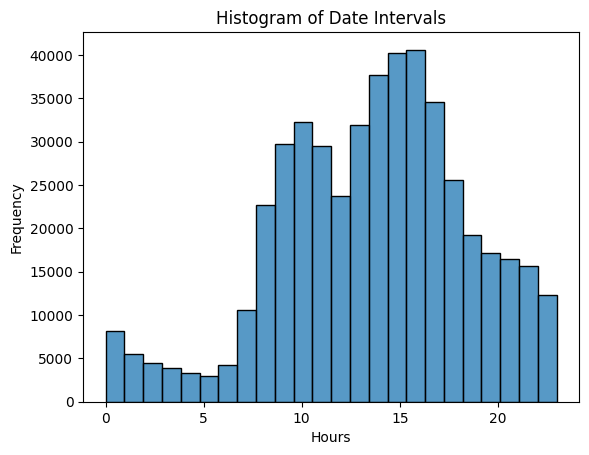

In [20]:
df = pd.read_csv('../emotions.csv')

df['date'] = pd.to_datetime(df['date'])

df['date_interval'] = df['date'].dt.hour

sns.histplot(df['date_interval'].astype(int), bins=24, kde=False) 
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.title('Histogram of Date Intervals')
plt.show()


# Распределение отправки сообщений по дате

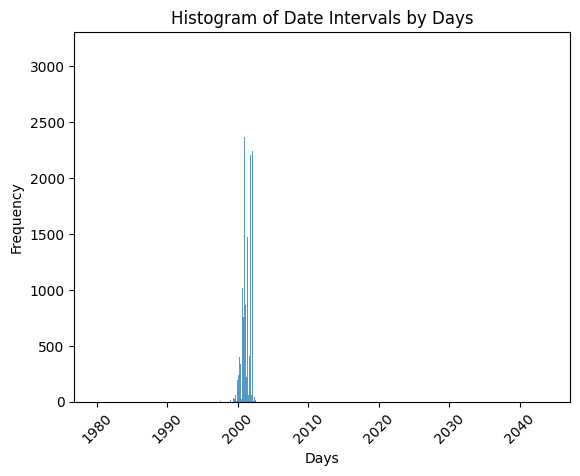

In [21]:
df = pd.read_csv('../emotions.csv')
df['date'] = pd. to_datetime(df ['date']) .dt. date
sns.histplot(df['date'], bins=len(df['date'].unique()), kde=False)
plt.xlabel('Days')
plt.ylabel('Frequency')
plt.title('Histogram of Date Intervals by Days') 
plt.xticks(rotation=45)
plt.show()

In [22]:
earliest_date = df ['date'].min()
latest_date = df ['date'].max ()
print(f"Earliest date: {earliest_date}")

Earliest date: 1980-01-01


# Корреляционная матрица

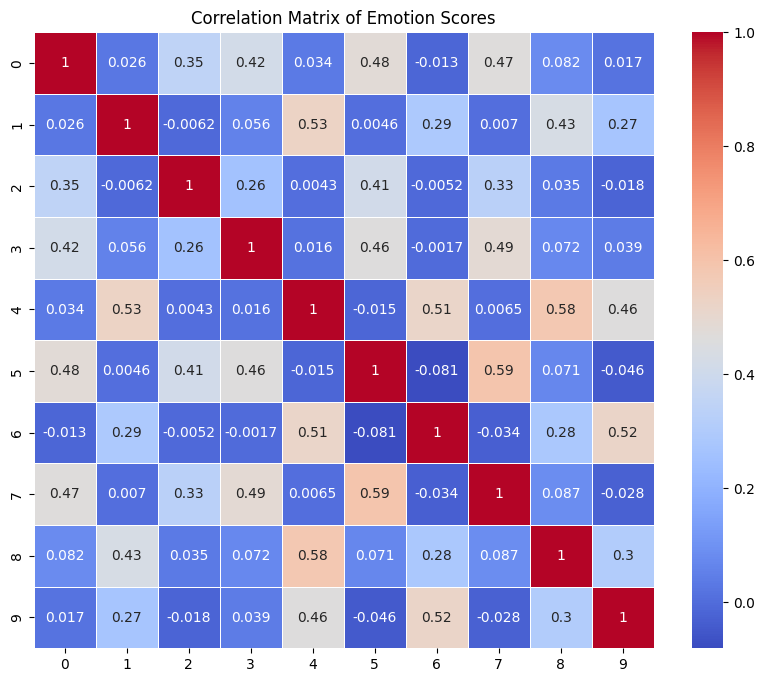

In [23]:
emotion_vectors = []

with open('../emotions.csv', 'r') as f:
    reader = csv.reader(f)
    names = next(reader)  

    for row in reader: 
        try:
            scores = [float(x) for x in row[-1].strip('[]').split()]
            emotion_vectors.append(scores)
        except ValueError as e:
            print(f"Error processing line {row}: {e}")
            continue

emotion_df = pd.DataFrame(emotion_vectors)

if not emotion_df.empty:
    correlation_matrix = emotion_df.corr()

    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title('Correlation Matrix of Emotion Scores')
    plt.show()
else:
    print("There is no data to construct a correlation matrix..")


# Пирог значений параметров emotion_scores и графики распределения значений



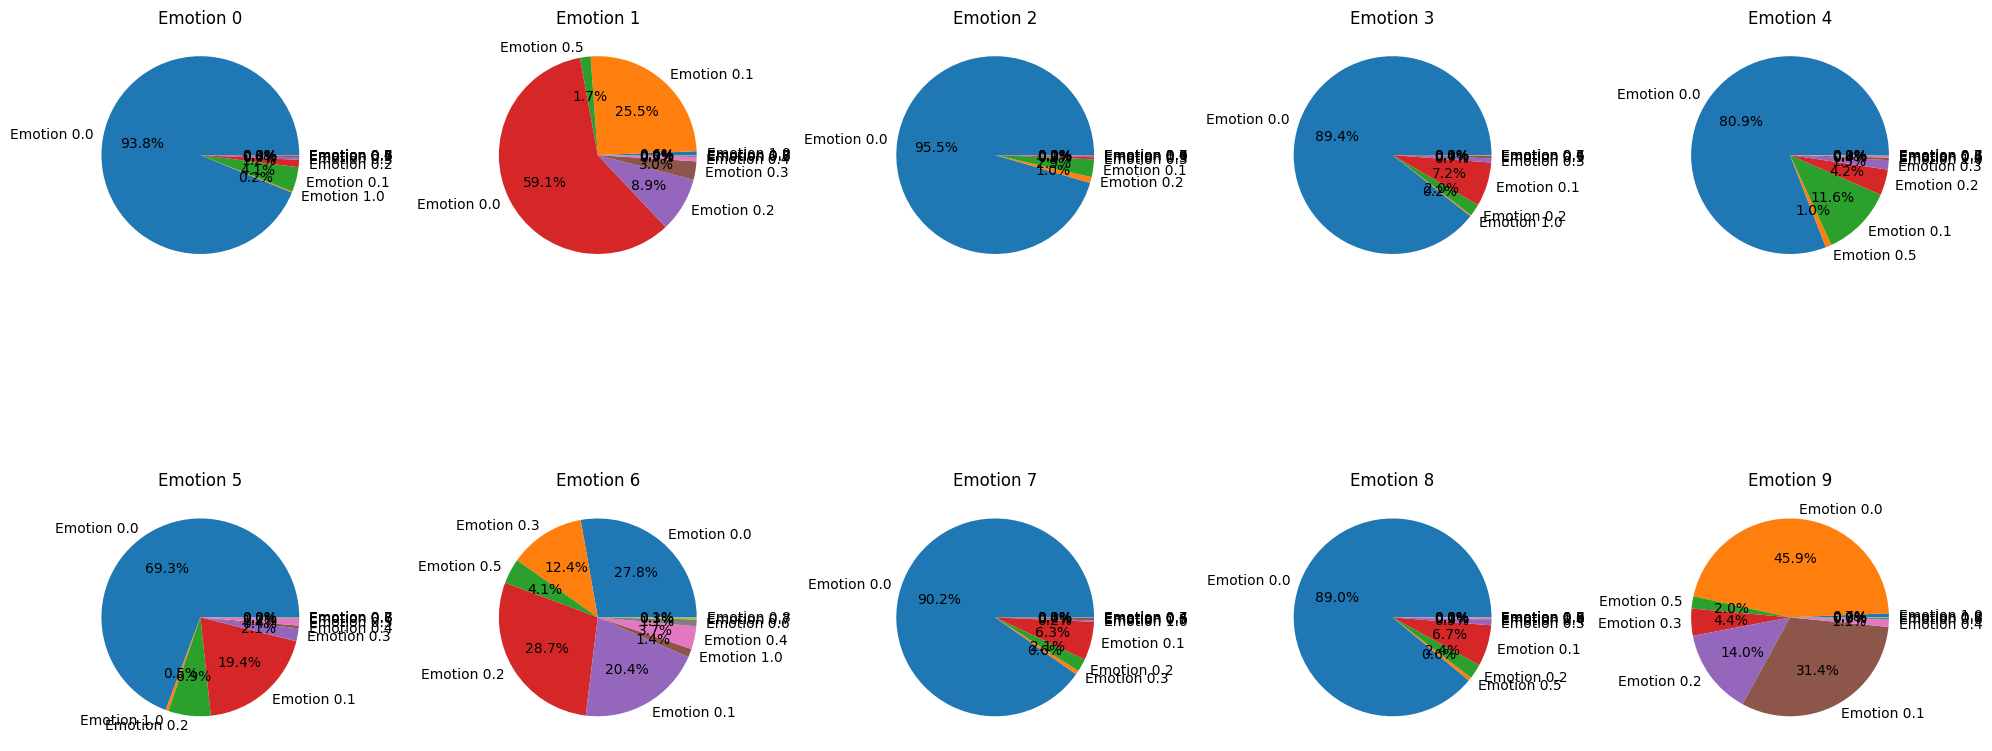

In [24]:
emotion_scores = [[] for _ in range(10)]
min_values = [2] * 10
max_values = [-2] * 10

with open('../emotions.csv', 'r') as f:
    reader = csv.reader(f)
    names = next(reader)  

    for i, row in enumerate(reader):
        scores = [float(x) for x in row[-1].strip('[]').split()] 
        for j in range(10):
            if scores[j] < min_values[j]: min_values[j] = scores[j]
            if scores[j] > max_values[j]: max_values[j] = scores[j]
            emotion_scores[j].append(((scores[j] * 10) // 1) / 10)  

fig, axs = plt.subplots(2, 5, figsize=(20, 10))

for j in range(10):
    emotion_counts = Counter(emotion_scores[j])
    labels = [f'Emotion {key}' for key in emotion_counts.keys()]
    sizes = list(emotion_counts.values())

    ax = axs[j // 5, j % 5]
    ax.pie(sizes, labels=labels, autopct='%1.1f%%')
    ax.set_title(f'Emotion {j}')

plt.tight_layout()
plt.show()

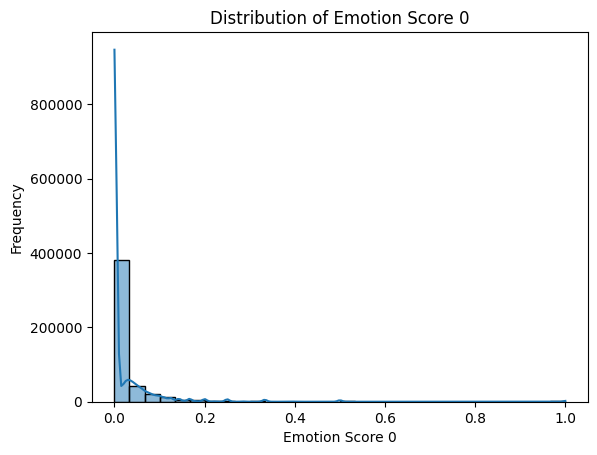

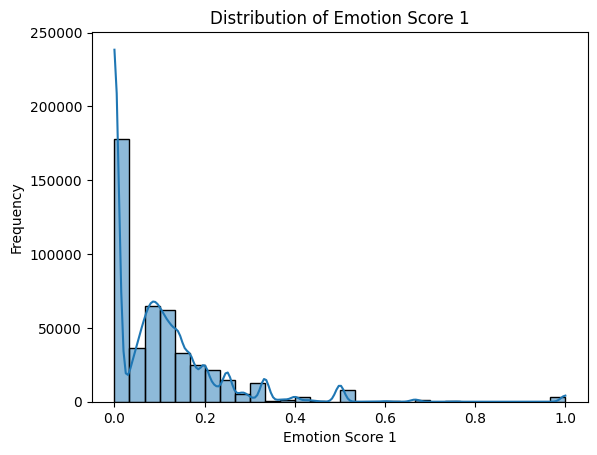

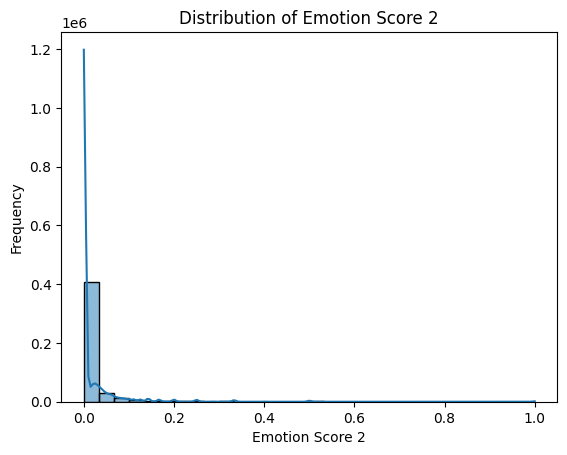

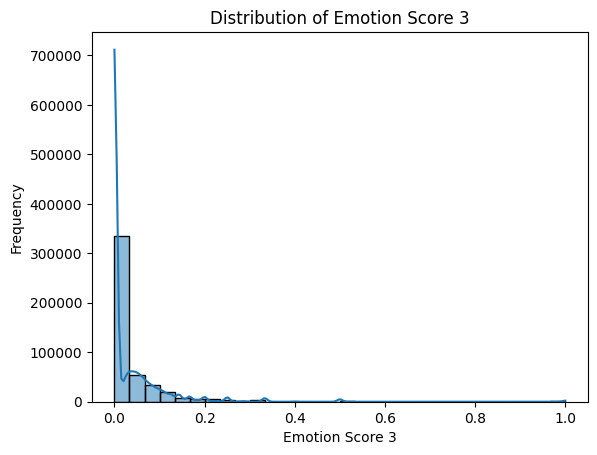

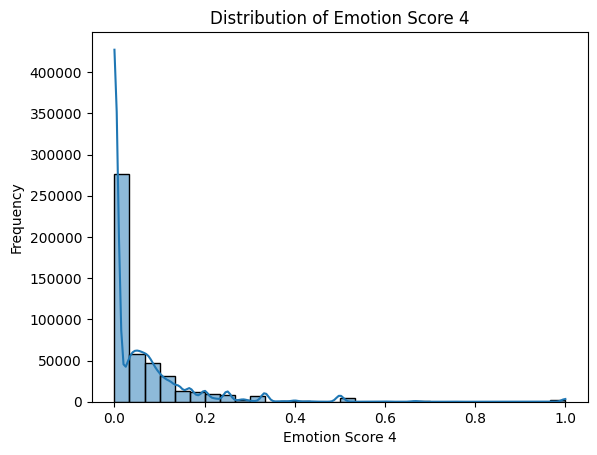

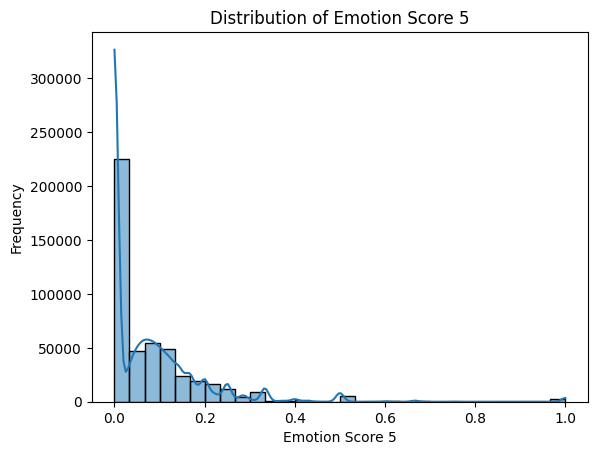

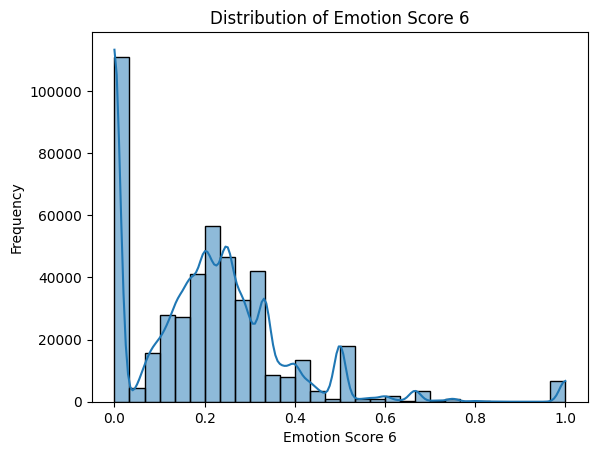

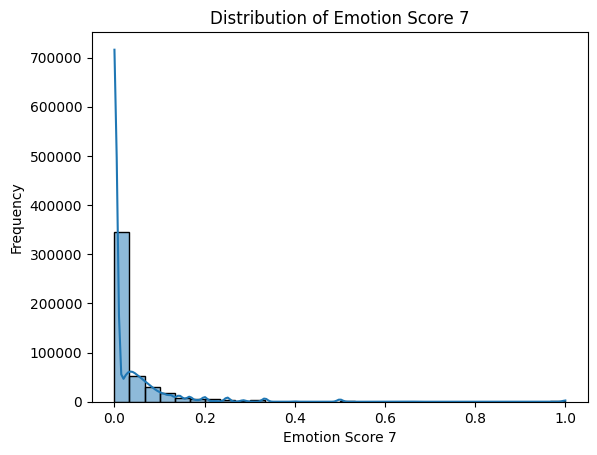

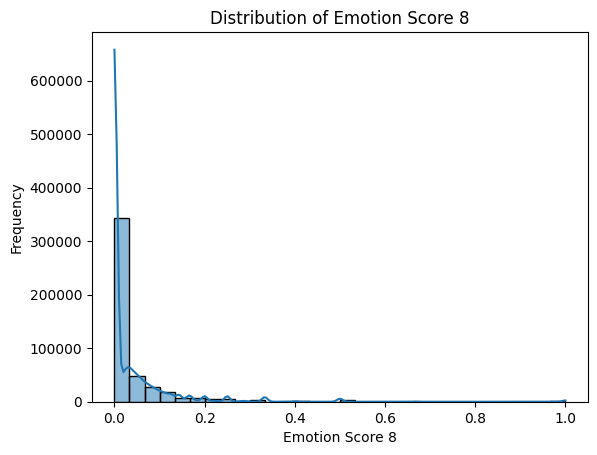

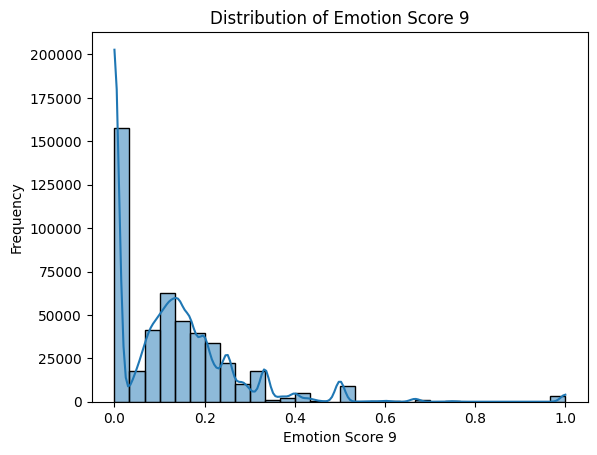

In [25]:
emotion_scores = [[] for _ in range(10)]  

csv.field_size_limit(sys.maxsize)
with open('../emotions.csv', 'r') as f:
    reader = csv.reader(f)
    names = next(reader)

    for row in reader:
        scores = [float(x) for x in row[-1].strip('[]').split()]
        for i in range(10):
            emotion_scores[i].append(scores[i])

for i in range(10):
    plt.figure()
    sns.histplot(emotion_scores[i], bins=30, kde=True)
    plt.xlabel(f'Emotion Score {i}')
    plt.ylabel('Frequency')
    plt.title(f'Distribution of Emotion Score {i}')
    plt.show()

# На данный момент в emotions.csv...

In [26]:
df = pd.read_csv('../emotions.csv')
df.head()

,Unnamed: 0,file,message,subject,text,date,from,to,emotion_scores
0,0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...,NaN,Here is our forecast\n\n,2001-05-14 23:39:00+00:00,phillip.allen@enron.com,tim.belden@enron.com,[0. 1. 0. 0. 0. 0. 0. 0. 0. 1.]
1,1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...,NaN,Traveling to have a business meeting takes the...,2001-05-04 20:51:00+00:00,phillip.allen@enron.com,john.lavorato@enron.com,[0.03571429 0.14285714 0.03571429 0.07142857 0...
2,2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...,test,test successful. way to go!!!,2000-10-18 10:00:00+00:00,phillip.allen@enron.com,leah.arsdall@enron.com,[0. 0.5 0. 0. 0.5 0. 0.5 0. 0. 0.5]
3,3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...,NaN,"Randy,\n\n Can you send me a schedule of the s...",2000-10-23 13:13:00+00:00,phillip.allen@enron.com,randall.gay@enron.com,[0. 0.16666667 0. 0. 0...
4,4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...,Hello,Let's shoot for Tuesday at 11:45.,2000-08-31 12:07:00+00:00,phillip.allen@enron.com,greg.piper@enron.com,[1. 0. 0. 1. 0. 1. 0. 0. 0. 0.]


# Леммантизация (результат кода lemma.ipynb)

In [27]:
df = pd.read_csv('./ignore/lemma_emotion.csv')
df.head(10)

,Unnamed: 0,file,message,subject,text,date,from,to,emotion_scores
0,0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...,NaN,forecast \n\n,2001-05-14 23:39:00+00:00,phillip.allen@enron.com,tim.belden@enron.com,[0. 1. 0. 0. 0. 0. 0. 0. 0. 1.]
1,1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...,NaN,travel business meeting fun trip especially ...,2001-05-04 20:51:00+00:00,phillip.allen@enron.com,john.lavorato@enron.com,[0.03571429 0.14285714 0.03571429 0.07142857 0...
2,2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...,test,test successful way,2000-10-18 10:00:00+00:00,phillip.allen@enron.com,leah.arsdall@enron.com,[0. 0.5 0. 0. 0.5 0. 0.5 0. 0. 0.5]
3,3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...,NaN,Randy \n\n send I schedule salary level \n sc...,2000-10-23 13:13:00+00:00,phillip.allen@enron.com,randall.gay@enron.com,[0. 0.16666667 0. 0. 0...
4,4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...,Hello,let shoot Tuesday 11:45,2000-08-31 12:07:00+00:00,phillip.allen@enron.com,greg.piper@enron.com,[1. 0. 0. 1. 0. 1. 0. 0. 0. 0.]
5,5,allen-p/_sent_mail/1002.,Message-ID: <30965995.1075863688265.JavaMail.e...,Hello,Greg \n\n Tuesday Thursday \n\n phillip,2000-08-31 11:17:00+00:00,phillip.allen@enron.com,greg.piper@enron.com,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
6,6,allen-p/_sent_mail/1003.,Message-ID: <16254169.1075863688286.JavaMail.e...,NaN,cc follow distribution list update \n\n Philli...,2000-08-22 14:44:00+00:00,phillip.allen@enron.com,"david.l.johnson@enron.com, john.shafer@enron.com",[0. 0. 0.2 0. 0. 0.2 0.2 0. 0. 0.2]
7,7,allen-p/_sent_mail/1004.,Message-ID: <17189699.1075863688308.JavaMail.e...,PRC review - phone calls,morning 10 11:30,2000-07-14 13:59:00+00:00,phillip.allen@enron.com,joyce.teixeira@enron.com,[0. 0.25 0. 0. 0. 0.25 0. 0. 0. ...
8,8,allen-p/_sent_mail/101.,Message-ID: <20641191.1075855687472.JavaMail.e...,High Speed Internet Access,1 login pallen pw ke9davis \n\n I think req...,2000-10-17 09:26:00+00:00,phillip.allen@enron.com,mark.scott@enron.com,[0. 0. 0. 0. 0. 0. 0. 0. ...
9,10,allen-p/_sent_mail/103.,Message-ID: <33076797.1075855687515.JavaMail.e...,FW: fixed forward or other Collar floor gas p...,Mr. Buckner \n\n deliver gas San Diego Enron ...,2000-10-16 13:42:00+00:00,phillip.allen@enron.com,buck.buckner@honeywell.com,[0. 0. 0. 0. 0...


 # Токенизация file, message, subject, from, to

In [28]:
df = pd.read_csv('./ignore/lemma_emotion.csv') 

label_encoder = LabelEncoder()

df['file'] = label_encoder.fit_transform(df['file'])
df['message'] = label_encoder.fit_transform(df['message'])
df['subject'] = label_encoder.fit_transform(df['subject'])
df['from'] = label_encoder.fit_transform(df['from'])
df['to'] = label_encoder.fit_transform(df['to'])

df.to_csv('./csv/token_emotion.csv', index=False)

In [29]:
df = pd.read_csv('./csv/token_emotion.csv') 
df.head(20)

,Unnamed: 0,file,message,subject,text,date,from,to,emotion_scores
0,0,0,136990,132210,forecast \n\n,2001-05-14 23:39:00+00:00,14899,52175,[0. 1. 0. 0. 0. 0. 0. 0. 0. 1.]
1,1,1,85112,132210,travel business meeting fun trip especially ...,2001-05-04 20:51:00+00:00,14899,29236,[0.03571429 0.14285714 0.03571429 0.07142857 0...
2,2,2,221947,36330,test successful way,2000-10-18 10:00:00+00:00,14899,33844,[0. 0.5 0. 0. 0.5 0. 0.5 0. 0. 0.5]
3,3,3,54440,132210,Randy \n\n send I schedule salary level \n sc...,2000-10-23 13:13:00+00:00,14899,43075,[0. 0.16666667 0. 0. 0...
4,4,4,326843,15708,let shoot Tuesday 11:45,2000-08-31 12:07:00+00:00,14899,23349,[1. 0. 0. 1. 0. 1. 0. 0. 0. 0.]
5,5,5,327537,15708,Greg \n\n Tuesday Thursday \n\n phillip,2000-08-31 11:17:00+00:00,14899,23349,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
6,6,6,97487,132210,cc follow distribution list update \n\n Philli...,2000-08-22 14:44:00+00:00,14899,10306,[0. 0. 0.2 0. 0. 0.2 0.2 0. 0. 0.2]
7,7,7,112170,23686,morning 10 11:30,2000-07-14 13:59:00+00:00,14899,30084,[0. 0.25 0. 0. 0. 0.25 0. 0. 0. ...
8,8,8,165864,15928,1 login pallen pw ke9davis \n\n I think req...,2000-10-17 09:26:00+00:00,14899,37006,[0. 0. 0. 0. 0. 0. 0. 0. ...
9,10,9,360547,13026,Mr. Buckner \n\n deliver gas San Diego Enron ...,2000-10-16 13:42:00+00:00,14899,5525,[0. 0. 0. 0. 0...


# Удаление строк с нулевыми параметрами emotion_scores

In [30]:
csv.field_size_limit(sys.maxsize)
input_file = './csv/token_emotion.csv'
output_file = './csv/token_lemma_filter_emotion.csv'

with open(input_file, 'r') as f, open(output_file, 'w', newline='') as out_f:
    reader = csv.reader(f)
    writer = csv.writer(out_f)
    
    names = next(reader)
    writer.writerow(names) 

    for row in reader:
        scores = [float(x) for x in row[-1].strip('[]').split()]
        
        if sum(scores) != 0:
            writer.writerow(row)

print(f"File '{output_file}' successfully created with filtered data.")

File './csv/token_lemma_filter_emotion.csv' successfully created with filtered data.


In [31]:
input_file = './csv/token_lemma_filter_emotion.csv'

count_zero_sum = 0

with open(input_file, 'r') as f:
    reader = csv.reader(f)
    
    names = next(reader)

    for row in reader:
        scores = [float(x) for x in row[-1].strip('[]').split()]
        
        if sum(scores) == 0:
            count_zero_sum += 1  

print(f"Number of rows where the sum of elements in 'emotion_scores' is 0: {count_zero_sum}")

Number of rows where the sum of elements in 'emotion_scores' is 0: 0


In [32]:
print(max_values)
print(min_values)
print("Elements already normalized")

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Elements already normalized


# Токенизация даты

In [33]:
df = pd.read_csv('./csv/token_lemma_filter_emotion.csv')

epoch = datetime(1980, 1, 1, tzinfo=timezone.utc)

def convert_to_seconds(date_str):
    date_time = datetime.strptime(date_str, '%Y-%m-%d %H:%M:%S%z')
    return int((date_time - epoch).total_seconds())

df['date'] = df['date'].apply(convert_to_seconds)

df.to_csv('./csv/token_lemma_filter_emotion.csv', index=False)

print("Файл 'token_lemma_filter_emotion.csv' успешно обновлен.")

Файл 'token_lemma_filter_emotion.csv' успешно обновлен.


In [34]:
import pandas as pd
df = pd.read_csv('./csv/token_lemma_filter_emotion.csv')
df.head(20)

,Unnamed: 0,file,message,subject,text,date,from,to,emotion_scores
0,0,0,136990,132210,forecast \n\n,674350740,14899,52175,[0. 1. 0. 0. 0. 0. 0. 0. 0. 1.]
1,1,1,85112,132210,travel business meeting fun trip especially ...,673476660,14899,29236,[0.03571429 0.14285714 0.03571429 0.07142857 0...
2,2,2,221947,36330,test successful way,656330400,14899,33844,[0. 0.5 0. 0. 0.5 0. 0.5 0. 0. 0.5]
3,3,3,54440,132210,Randy \n\n send I schedule salary level \n sc...,656773980,14899,43075,[0. 0.16666667 0. 0. 0...
4,4,4,326843,15708,let shoot Tuesday 11:45,652190820,14899,23349,[1. 0. 0. 1. 0. 1. 0. 0. 0. 0.]
5,6,6,97487,132210,cc follow distribution list update \n\n Philli...,651422640,14899,10306,[0. 0. 0.2 0. 0. 0.2 0.2 0. 0. 0.2]
6,7,7,112170,23686,morning 10 11:30,648050340,14899,30084,[0. 0.25 0. 0. 0. 0.25 0. 0. 0. ...
7,8,8,165864,15928,1 login pallen pw ke9davis \n\n I think req...,656241960,14899,37006,[0. 0. 0. 0. 0. 0. 0. 0. ...
8,10,9,360547,13026,Mr. Buckner \n\n deliver gas San Diego Enron ...,656170920,14899,5525,[0. 0. 0. 0. 0...
9,11,10,241286,132210,Lucy \n\n rentroll \n\n\n\n open save rentro...,655911900,14899,49148,[0.125 0. 0.125 0. 0.125 0.125 0.125 0. ...


# Токенизация лемм в text (lemma.ipynb)

In [2]:
import pandas as pd
df = pd.read_csv("./ignore/token_lemma_filter_emotion_token.csv")

df.head(20)

,Unnamed: 0,file,message,subject,text,date,from,to,emotion_scores
0,0,0,136990,132210,9473,674350740,14899,52175,[0. 1. 0. 0. 0. 0. 0. 0. 0. 1.]
1,1,1,85112,132210,13098 8110 10873 9545 13114 9201 11713 11720 4...,673476660,14899,29236,[0.03571429 0.14285714 0.03571429 0.07142857 0...
2,2,2,221947,36330,12945 12770 13413,656330400,14899,33844,[0. 0.5 0. 0. 0.5 0. 0.5 0. 0. 0.5]
3,3,3,54440,132210,6242 12359 4711 12300 12276 10646 12302 9671 1...,656773980,14899,43075,[0. 0.16666667 0. 0. 0...
4,4,4,326843,15708,10642 12432 7090 1053,652190820,14899,23349,[1. 0. 0. 1. 0. 1. 0. 0. 0. 0.]
5,6,6,97487,132210,8201 9458 8891 10691 13252 5999 2894 11458 545...,651422640,14899,10306,[0. 0. 0.2 0. 0. 0.2 0.2 0. 0. 0.2]
6,7,7,112170,23686,11000 861 1046,648050340,14899,30084,[0. 0.25 0. 0. 0. 0.25 0. 0. 0. ...
7,8,8,165864,15928,703 10718 11452 11848 10540 4711 12973 12099 1...,656241960,14899,37006,[0. 0. 0. 0. 0. 0. 0. 0. ...
8,10,9,360547,13026,5509 3269 8757 9577 6563 3894 4105 4099 6639 7...,656170920,14899,5525,[0. 0. 0. 0. 0...
9,11,10,241286,132210,5216 12074 11291 12290 12074 9456 9458 12685 1...,655911900,14899,49148,[0.125 0. 0.125 0. 0.125 0.125 0.125 0. ...


# Сортировка по date

In [35]:
df = pd.read_csv('./ignore/token_lemma_filter_emotion_token.csv')
sorted_df = df.sort_values(by='date')

sorted_df.to_csv('./result/september.csv', index=False)

print("File 'september.csv' successfully created with sorted data.")

File 'september.csv' successfully created with sorted data.


In [36]:
df = pd.read_csv('./result/september.csv')

df.head(30)

,Unnamed: 0,file,message,subject,text,date,from,to,emotion_scores
0,240475,216050,239080,132210,6562 12510 5447 12122 14368 14125 16224 4597 1...,0,17917,39435,[0. 0.09375 0. 0.03125 0.125 0. ...
1,231468,208137,177449,121217,3833 6660 13658 446 16658 7193 6660 3958 12375...,0,14350,13150,[0.02777778 0.05555556 0.05555556 0.05555556 0...
2,231581,208236,276335,121217,10861 4628 10928 17400 7741 5489 18357 15348 1...,0,1422,13448,[0.2 0. 0. 0.2 0. 0.2 0.2 0.2 0. 0. ]
3,231582,208237,116126,121217,3306 13193 16689 2184 11333 6726 5981 7460 813...,0,1422,13447,[0.05533597 0.08498024 0.02371542 0.06719368 0...
4,231584,208239,321587,121217,6145 3023 11333 6480 3546 3776 4502 1024,0,1422,13445,[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
5,231585,208240,432763,121217,7370 15999 10732 12100 446 446 1050 11333 4502...,0,1422,13444,[0. 0. 0. 0. 0. 0. 0.5 0. 0. 0.5]
6,231589,208243,330564,121217,11096 11333 6458 8279 6018 4243 1029 11333 797...,0,1422,13443,[0.05263158 0.0877193 0.01754386 0.07017544 0...
7,231590,208244,415039,121217,6987 6044 8603 7643 7469 5470 8443 11333 5780 ...,0,1422,13442,[0. 0. 0.25 0. 0. 0.25 0. 0. 0. ...
8,231808,208440,225425,121217,3399 5112 9223 7591 5085 2478 9758 13230 2266 ...,0,12482,13678,[0. 0.11111111 0. 0.03703704 0...
9,90767,83541,467279,56716,4669 3082 3693 4755 4511 4285 2745 3329 170 29...,0,4463,31312,[0.06666667 0.06666667 0.06666667 0.06666667 0...
